In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_excel('cleaned_data.xlsx')

In [4]:
df.head()

,Customer ID,Status,days_ago_joined,Age,accum_points,points_per_day,days_ago_last_arrived,arrivals_count,Australia,China,...,Singapore,Taiwan,Thailand,United Arab Emirates,United States of America,Diamond,Jade,Platinum,Royal,Ruby
0,1820,1,2364,53,1950,0.82,1655,2,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1822,1,2364,38,22020,9.31,342,4,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1823,1,2364,56,166590,70.47,554,15,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1824,1,2364,45,64825,27.42,38,13,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1825,1,2364,41,52119,22.05,206,7,0,0,...,1,0,0,0,0,1,0,0,0,0


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop(['Status','Customer ID'],axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled_features = scaler.transform(df.drop(['Status','Customer ID'],axis=1))

In [9]:
scaled_features

array([[ 1.89770348,  1.01897528, -0.73323638, ..., -0.18635536,
        -0.06882001, -0.50023568],
       [ 1.89770348, -0.60836788, -0.10705163, ..., -0.18635536,
        -0.06882001, -0.50023568],
       [ 1.89770348,  1.34444392,  4.40353773, ...,  5.36609204,
        -0.06882001, -0.50023568],
       ...,
       [-1.5115507 , -1.25930514, -0.79407645, ..., -0.18635536,
        -0.06882001, -0.50023568],
       [-1.5115507 , -0.93383651, -0.79407645, ..., -0.18635536,
        -0.06882001, -0.50023568],
       [-1.5115507 , -1.04232606, -0.79407645, ..., -0.18635536,
        -0.06882001, -0.50023568]])

In [10]:
newDf = pd.DataFrame(scaled_features,columns=df.columns[2:])

In [11]:
newDf.head()

,days_ago_joined,Age,accum_points,points_per_day,days_ago_last_arrived,arrivals_count,Australia,China,Hong Kong,Indonesia,...,Singapore,Taiwan,Thailand,United Arab Emirates,United States of America,Diamond,Jade,Platinum,Royal,Ruby
0,1.897703,1.018975,-0.733236,-0.710453,3.528399,-0.526935,-0.158206,-0.92082,-0.31183,-0.122572,...,-0.297415,-0.186626,2.624166,-0.137209,-0.135775,1.386376,-0.849821,-0.186355,-0.06882,-0.500236
1,1.897703,-0.608368,-0.107052,-0.456516,0.222211,-0.104103,-0.158206,-0.92082,-0.31183,-0.122572,...,-0.297415,-0.186626,-0.381074,-0.137209,-0.135775,-0.721305,1.176719,-0.186355,-0.06882,-0.500236
2,1.897703,1.344444,4.403538,1.372786,0.756035,2.221469,6.320891,-0.92082,-0.31183,-0.122572,...,-0.297415,-0.186626,-0.381074,-0.137209,-0.135775,-0.721305,-0.849821,5.366092,-0.06882,-0.500236
3,1.897703,0.151059,1.228466,0.085156,-0.543274,1.798638,-0.158206,-0.92082,-0.31183,-0.122572,...,-0.297415,-0.186626,-0.381074,-0.137209,-0.135775,1.386376,-0.849821,-0.186355,-0.06882,-0.500236
4,1.897703,-0.282899,0.832038,-0.075462,-0.120243,0.530144,-0.158206,-0.92082,-0.31183,-0.122572,...,3.362306,-0.186626,-0.381074,-0.137209,-0.135775,1.386376,-0.849821,-0.186355,-0.06882,-0.500236


In [12]:
from sklearn.cross_validation import train_test_split

c:\users\mojiway\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
X = newDf
y = df['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [17]:
pred = knn.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 166  195]
 [ 176 2646]]
             precision    recall  f1-score   support

          0       0.49      0.46      0.47       361
          1       0.93      0.94      0.93      2822

avg / total       0.88      0.88      0.88      3183



In [20]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test))

Text(0,0.5,'Errors')

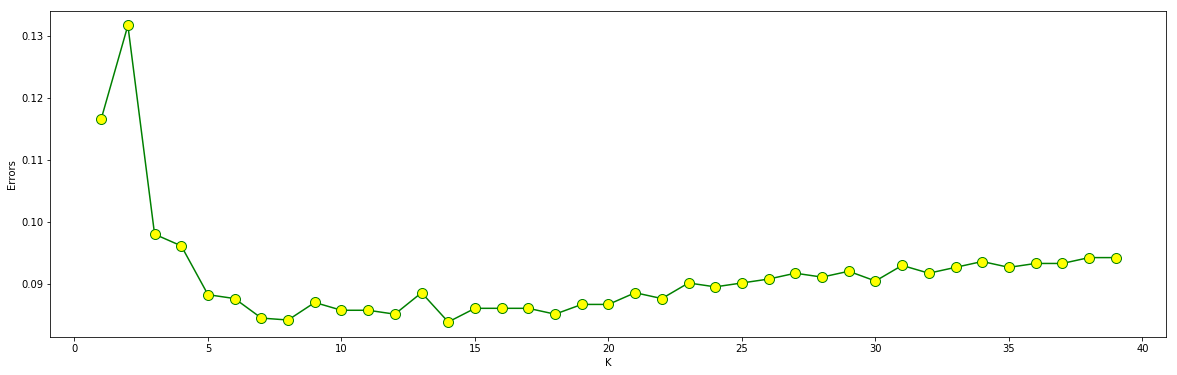

In [21]:
plt.figure(figsize=(20,6))
plt.plot(range(1,40),error_rate,color='green',marker='o',markerfacecolor='yellow',markersize=10)

plt.xlabel('K')
plt.ylabel('Errors')

In [22]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[ 160  201]
 [  66 2756]]


             precision    recall  f1-score   support

          0       0.71      0.44      0.55       361
          1       0.93      0.98      0.95      2822

avg / total       0.91      0.92      0.91      3183



In [25]:
submission = pd.DataFrame({
        "prediction": pred,
        "real churn": y_test
        
    })
submission.to_excel('submission_knn.xlsx', index=False)